# Defining the Question

### a) Specifying the Question

### b) Understanding the context 

### c) Defining the Metric for Success

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Modelling
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

# Data Preparation

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let import libraries that we will need for our analysis
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt



# set off the warnings that may appear
import warnings
warnings.filterwarnings(action='ignore') 

### Loading and Previewing our Dataset

In [ ]:
#There are six datasets.
bitfinex =  pd.read_csv('/content/BTC_USD Bitfinex Historical Data.csv')
bitcoin = pd.read_csv('/content/Bitcoin Historical Data Index.csv')
dowjones = pd.read_csv('/content/Dow Jones Industrial Average Historical Data.csv')
nasdaq = pd.read_csv('/content/NASDAQ Composite Historical Data.csv')
sp = pd.read_csv('/content/S&P 500 Historical Data.csv')
trends = pd.read_csv('/content/Bitcoin Google Trends.csv')

Check the shape of each dataset in order to get an idea of the best way to merge

In [ ]:
bitfinex.shape

(3356, 7)

In [ ]:
bitcoin.shape

(3391, 7)

In [ ]:
dowjones.shape

(2335, 7)

In [ ]:
nasdaq.shape

(2335, 7)

In [ ]:
sp.shape

(2335, 7)

In [ ]:
trends.shape

(2899, 2)

Preview each dataset to get a better understanding.


In [ ]:
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin %
0,14-Apr-21,"62,795.90","63,544.20","64,778.00","62,557.40",116.57K,-1.17%
1,13-Apr-21,"63,540.90","59,863.60","63,659.00","59,839.40",126.56K,6.14%
2,12-Apr-21,"59,863.80","59,982.10","61,259.90","59,569.20",81.88K,-0.19%
3,11-Apr-21,"59,978.70","59,772.40","60,667.10","59,250.30",58.20K,0.39%
4,10-Apr-21,"59,748.40","58,127.40","61,229.00","57,900.00",103.72K,2.80%


In [ ]:
bitfinex.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,14-Apr-21,"63,546.00","63,518.00","64,374.00","62,826.00",9.99K,0.04%
1,13-Apr-21,"63,518.00","59,900.00","63,518.00","59,900.00",11.26K,6.04%
2,12-Apr-21,"59,900.00","60,034.80","60,701.00","59,747.00",5.50K,-0.22%
3,11-Apr-21,"60,034.80","59,823.80","60,486.00","59,411.00",4.65K,0.35%
4,10-Apr-21,"59,823.80","58,114.00","60,984.00","58,114.00",9.79K,2.94%


In [ ]:
dowjones.head()

,Date,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones
0,14-Apr-21,"33,874.69","33,668.95","33,910.59","33,668.95",175.46M,0.59%
1,13-Apr-21,"33,677.27","33,721.16","33,741.64","33,545.84",330.00M,-0.20%
2,12-Apr-21,"33,745.40","33,775.06","33,786.19","33,665.54",329.02M,-0.16%
3,9-Apr-21,"33,800.60","33,526.19","33,810.87","33,526.19",317.82M,0.89%
4,8-Apr-21,"33,503.57","33,469.89","33,506.80","33,342.64",306.19M,0.17%


In [ ]:
nasdaq.head()

,Date,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq
0,14-Apr-21,"13,947.08","14,004.07","14,033.63","13,928.49",439.56M,-0.35%
1,13-Apr-21,"13,996.10","13,902.45","14,011.51","13,902.45",839.45M,1.05%
2,12-Apr-21,"13,850.00","13,854.44","13,877.00","13,783.95",894.01M,-0.36%
3,9-Apr-21,"13,900.18","13,787.01","13,905.41","13,748.35",785.76M,0.51%
4,8-Apr-21,"13,829.31","13,796.89","13,830.14","13,758.71",870.92M,1.03%


In [ ]:
sp.head()

,Date,price_sp,open_sp,high_sp,low_sp,vol_sp,change_sp
0,14-Apr-21,"4,141.84","4,140.40","4,151.97","4,138.20",-,0.01%
1,13-Apr-21,"4,141.59","4,130.10","4,148.00","4,124.43",-,0.33%
2,12-Apr-21,"4,127.99","4,124.71","4,131.76","4,114.82",-,-0.02%
3,9-Apr-21,"4,128.80","4,096.11","4,129.48","4,095.51",-,0.77%
4,8-Apr-21,"4,097.17","4,089.95","4,098.19","4,082.54",-,0.42%


In [ ]:
trends.head()

,Date,bitcoins
0,1/1/2012,26
1,1/2/2012,27
2,1/3/2012,38
3,1/4/2012,18
4,1/5/2012,25


It is already clear that the dates are written in inconsistent formats. We shall convert each to a consistent one.

In [ ]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date']).dt.date
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin %
0,2021-04-14,"62,795.90","63,544.20","64,778.00","62,557.40",116.57K,-1.17%
1,2021-04-13,"63,540.90","59,863.60","63,659.00","59,839.40",126.56K,6.14%
2,2021-04-12,"59,863.80","59,982.10","61,259.90","59,569.20",81.88K,-0.19%
3,2021-04-11,"59,978.70","59,772.40","60,667.10","59,250.30",58.20K,0.39%
4,2021-04-10,"59,748.40","58,127.40","61,229.00","57,900.00",103.72K,2.80%


In [ ]:
bitfinex['Date'] = pd.to_datetime(bitfinex['Date']).dt.date
bitfinex.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-04-14,"63,546.00","63,518.00","64,374.00","62,826.00",9.99K,0.04%
1,2021-04-13,"63,518.00","59,900.00","63,518.00","59,900.00",11.26K,6.04%
2,2021-04-12,"59,900.00","60,034.80","60,701.00","59,747.00",5.50K,-0.22%
3,2021-04-11,"60,034.80","59,823.80","60,486.00","59,411.00",4.65K,0.35%
4,2021-04-10,"59,823.80","58,114.00","60,984.00","58,114.00",9.79K,2.94%


In [ ]:
dowjones['Date'] = pd.to_datetime(dowjones['Date']).dt.date
dowjones.head()

,Date,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones
0,2021-04-14,"33,874.69","33,668.95","33,910.59","33,668.95",175.46M,0.59%
1,2021-04-13,"33,677.27","33,721.16","33,741.64","33,545.84",330.00M,-0.20%
2,2021-04-12,"33,745.40","33,775.06","33,786.19","33,665.54",329.02M,-0.16%
3,2021-04-09,"33,800.60","33,526.19","33,810.87","33,526.19",317.82M,0.89%
4,2021-04-08,"33,503.57","33,469.89","33,506.80","33,342.64",306.19M,0.17%


In [ ]:
nasdaq['Date'] = pd.to_datetime(nasdaq['Date']).dt.date
nasdaq.head()

,Date,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq
0,2021-04-14,"13,947.08","14,004.07","14,033.63","13,928.49",439.56M,-0.35%
1,2021-04-13,"13,996.10","13,902.45","14,011.51","13,902.45",839.45M,1.05%
2,2021-04-12,"13,850.00","13,854.44","13,877.00","13,783.95",894.01M,-0.36%
3,2021-04-09,"13,900.18","13,787.01","13,905.41","13,748.35",785.76M,0.51%
4,2021-04-08,"13,829.31","13,796.89","13,830.14","13,758.71",870.92M,1.03%


In [ ]:
sp['Date'] = pd.to_datetime(sp['Date']).dt.date
sp.head()

,Date,price_sp,open_sp,high_sp,low_sp,vol_sp,change_sp
0,2021-04-14,"4,141.84","4,140.40","4,151.97","4,138.20",-,0.01%
1,2021-04-13,"4,141.59","4,130.10","4,148.00","4,124.43",-,0.33%
2,2021-04-12,"4,127.99","4,124.71","4,131.76","4,114.82",-,-0.02%
3,2021-04-09,"4,128.80","4,096.11","4,129.48","4,095.51",-,0.77%
4,2021-04-08,"4,097.17","4,089.95","4,098.19","4,082.54",-,0.42%


In [ ]:
trends['Date'] = pd.to_datetime(trends['Date']).dt.date
trends.head()

,Date,bitcoins
0,2012-01-01,26
1,2012-01-02,27
2,2012-01-03,38
3,2012-01-04,18
4,2012-01-05,25


Merging

In [ ]:
from functools import reduce
data = [bitcoin,bitfinex,dowjones,nasdaq,sp,trends]
merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data)
merged

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin %,Price,Open,High,Low,Vol.,Change %,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,vol_sp,change_sp,bitcoins
0,2021-04-14,"62,795.90","63,544.20","64,778.00","62,557.40",116.57K,-1.17%,"63,546.00","63,518.00","64,374.00","62,826.00",9.99K,0.04%,"33,874.69","33,668.95","33,910.59","33,668.95",175.46M,0.59%,"13,947.08","14,004.07","14,033.63","13,928.49",439.56M,-0.35%,"4,141.84","4,140.40","4,151.97","4,138.20",-,0.01%,NaN
1,2021-04-13,"63,540.90","59,863.60","63,659.00","59,839.40",126.56K,6.14%,"63,518.00","59,900.00","63,518.00","59,900.00",11.26K,6.04%,"33,677.27","33,721.16","33,741.64","33,545.84",330.00M,-0.20%,"13,996.10","13,902.45","14,011.51","13,902.45",839.45M,1.05%,"4,141.59","4,130.10","4,148.00","4,124.43",-,0.33%,NaN
2,2021-04-12,"59,863.80","59,982.10","61,259.90","59,569.20",81.88K,-0.19%,"59,900.00","60,034.80","60,701.00","59,747.00",5.50K,-0.22%,"33,745.40","33,775.06","33,786.19","33,665.54",329.02M,-0.16%,"13,850.00","13,854.44","13,877.00","13,783.95",894.01M,-0.36%,"4,127.99","4,124.71","4,131.76","4,114.82",-,-0.02%,NaN
3,2021-04-11,"59,978.70","59,772.40","60,667.10","59,250.30",58.20K,0.39%,"60,034.80","59,823.80","60,486.00","59,411.00",4.65K,0.35%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4,2021-04-10,"59,748.40","58,127.40","61,229.00","57,900.00",103.72K,2.80%,"59,823.80","58,114.00","60,984.00","58,114.00",9.79K,2.94%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2012-01-05,6.9,5.6,7.2,5.6,182.33K,24.78%,NaN,NaN,NaN,NaN,NaN,NaN,"12,415.70","12,418.42","12,435.98","12,283.90",158.44M,-0.02%,"2,669.86","2,642.57","2,673.56","2,631.23",442.08M,0.81%,"1,281.06","1,277.30","1,283.05","1,265.26",-,0.29%,25.0
3388,2012-01-04,5.6,4.9,5.7,4.8,131.17K,14.14%,NaN,NaN,NaN,NaN,NaN,NaN,"12,418.42","12,392.46","12,430.00","12,337.25",145.13M,0.17%,"2,648.36","2,639.90","2,653.18","2,627.23",411.09M,-0.01%,"1,277.30","1,277.03","1,278.73","1,268.10",-,0.02%,18.0
3389,2012-01-03,4.9,5.2,5.3,4.7,125.17K,-6.51%,NaN,NaN,NaN,NaN,NaN,NaN,"12,397.38","12,221.19","12,479.65","12,221.19",152.56M,1.47%,"2,648.72","2,657.39","2,665.90","2,641.98",411.79M,1.67%,"1,277.06","1,258.86","1,284.62","1,258.86",-,1.55%,38.0
3390,2012-01-02,5.2,5.3,5.5,4.8,69.15K,-0.95%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0


In [ ]:
#Here is our new, merged dataset
#There are 3392 rows and 32 columns
merged.shape

(3392, 32)

In [ ]:
#The formats of the dates  are consistent
merged.Date

0       2021-04-14
1       2021-04-13
2       2021-04-12
3       2021-04-11
4       2021-04-10
           ...    
3387    2012-01-05
3388    2012-01-04
3389    2012-01-03
3390    2012-01-02
3391    2012-01-01
Name: Date, Length: 3392, dtype: object

In [ ]:
#check for null values after merging
merged.isnull().sum()

Date                   0
price_bitcoin          1
open_bitcoin           1
high_bitcoin           1
low_bitcoin            1
vol_bitcoin            1
Change_bitcoin %       1
Price                 36
Open                  36
High                  36
Low                   36
Vol.                  36
Change %              36
price_dowjones      1057
open_dowjones       1057
high_dowjones       1057
low_dowjones        1057
vol_dowjones        1057
change_dowjones     1057
price_nasdaq        1057
open_nasdaq         1057
high_nasdaq         1057
low_nasdaq          1057
vol_nasdaq          1057
change_nasdaq       1057
price_sp            1057
open_sp             1057
high_sp             1057
low_sp              1057
vol_sp              1057
change_sp           1057
bitcoins             493
dtype: int64

The merged data is now ready for cleaning, particularly dealing with null values.

## Data Cleaning

In [ ]:
# replacing spaces in column names
merged.columns = merged.columns.str.replace(' ', '_')

In [ ]:
# Dropping of irrelevant Data Columns
#
merged = merged.drop(['Unnamed:_0', 'Unnamed:_0.1', 'vol_sp'], axis=1)
merged.head()

In [ ]:
# removing the commas from the dataset
merged = merged.replace(',','', regex=True)
merged.head()

In [ ]:
# converting the date column to date type
merged['Date'] = pd.to_datetime(merged['Date'], format='%Y-%m-%d')

In [ ]:
# converting columns to there respective data type
merged["price_bitcoin"] = pd.to_numeric(merged.price_bitcoin, errors='coerce')
merged["open_bitcoin"] = pd.to_numeric(merged.open_bitcoin, errors='coerce')
merged["high_bitcoin"] = pd.to_numeric(merged.high_bitcoin, errors='coerce')
merged["low_bitcoin"] = pd.to_numeric(merged.low_bitcoin, errors='coerce')
merged["price_dowjones"] = pd.to_numeric(merged.price_dowjones, errors='coerce')
merged["open_dowjones"] = pd.to_numeric(merged.open_dowjones, errors='coerce')
merged["price_nasdaq"] = pd.to_numeric(merged.price_nasdaq, errors='coerce')
merged["open_nasdaq"] = pd.to_numeric(merged.open_nasdaq, errors='coerce')
merged["high_nasdaq"] = pd.to_numeric(merged.high_nasdaq, errors='coerce')
merged["low_nasdaq"] = pd.to_numeric(merged.low_nasdaq, errors='coerce')
merged["price_sp"] = pd.to_numeric(merged.price_sp, errors='coerce')
merged["open_sp"] = pd.to_numeric(merged.open_sp, errors='coerce')
merged["high_sp"] = pd.to_numeric(merged.high_sp, errors='coerce')
merged["low_sp"] = pd.to_numeric(merged.low_sp, errors='coerce')
merged["high_dowjones"] = pd.to_numeric(merged.high_dowjones, errors='coerce')
merged["low_dowjones"] = pd.to_numeric(merged.low_dowjones, errors='coerce')
merged.dtypes

In [ ]:
# converting percentage columns to float

merged[merged.columns[6]] = merged[merged.columns[6]].replace('[-\$,%]', '', regex=True).astype(float)
merged[merged.columns[12]] = merged[merged.columns[12]].replace('[-\$,%]', '', regex=True).astype(float)
merged[merged.columns[18]] = merged[merged.columns[18]].replace('[-\$,%]', '', regex=True).astype(float)
merged[merged.columns[23]] = merged[merged.columns[23]].replace('[-\$,%]', '', regex=True).astype(float)

merged[merged.columns[5]] = merged[merged.columns[5]].replace('[KM]', '', regex=True).astype(float)
merged[merged.columns[11]] = merged[merged.columns[11]].replace('[KM]', '', regex=True).astype(float)
merged[merged.columns[17]] = merged[merged.columns[17]].replace('[KMB]', '', regex=True).astype(float)

In [ ]:
# previewing the cleaned data
merged.head()

In [ ]:
# checking data type
merged.dtypes

In [ ]:
# downloading the clean data in form of csv
#
merged.to_csv('numeric_clean_bitcoin_data.csv')

In [ ]:
# Loading the Dataset from the source i.e. csv
bitcoin = pd.read_csv('/content/numeric_clean_bitcoin_data.csv')
bitcoin.head()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


In [ ]:
bitcoin = bitcoin.drop(['Unnamed: 0'], axis=1)

## Checking the Data

In [ ]:
# Determining the no. of records
#
bitcoin.shape

(3390, 26)

In [ ]:
# Check for the top data
bitcoin.head()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


In [ ]:
# check for the bottom data
bitcoin.tail()

,Unnamed: 0,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
3385,3385,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0
3386,3386,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0
3387,3387,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0
3388,3388,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0
3389,3389,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0


In [ ]:
# Checking whether each column has an appropriate datatype
#
bitcoin.dtypes

Unnamed: 0            int64
Date                 object
price_bitcoin       float64
open_bitcoin        float64
high_bitcoin        float64
low_bitcoin         float64
vol_bitcoin         float64
Change_bitcoin_%    float64
price_dowjones      float64
open_dowjones       float64
high_dowjones       float64
low_dowjones        float64
vol_dowjones        float64
change_dowjones     float64
price_nasdaq        float64
open_nasdaq         float64
high_nasdaq         float64
low_nasdaq          float64
vol_nasdaq          float64
change_nasdaq       float64
price_sp            float64
open_sp             float64
high_sp             float64
low_sp              float64
change_sp           float64
trend_bitcoins      float64
dtype: object

In [ ]:
# checking the dataset information
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3390 non-null   int64  
 1   Date              3390 non-null   object 
 2   price_bitcoin     3390 non-null   float64
 3   open_bitcoin      3390 non-null   float64
 4   high_bitcoin      3390 non-null   float64
 5   low_bitcoin       3390 non-null   float64
 6   vol_bitcoin       3390 non-null   float64
 7   Change_bitcoin_%  3390 non-null   float64
 8   price_dowjones    3390 non-null   float64
 9   open_dowjones     3390 non-null   float64
 10  high_dowjones     3390 non-null   float64
 11  low_dowjones      3390 non-null   float64
 12  vol_dowjones      3390 non-null   float64
 13  change_dowjones   3390 non-null   float64
 14  price_nasdaq      3390 non-null   float64
 15  open_nasdaq       3390 non-null   float64
 16  high_nasdaq       3390 non-null   float64


In [ ]:
# check columns in our dataframe
bitcoin.columns

Index(['Unnamed: 0', 'Date', 'price_bitcoin', 'open_bitcoin', 'high_bitcoin',
       'low_bitcoin', 'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones',
       'open_dowjones', 'high_dowjones', 'low_dowjones', 'vol_dowjones',
       'change_dowjones', 'price_nasdaq', 'open_nasdaq', 'high_nasdaq',
       'low_nasdaq', 'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp',
       'high_sp', 'low_sp', 'change_sp', 'trend_bitcoins'],
      dtype='object')

# Exploratory Data Analysis

##Univariate

In [ ]:
# get the summary of the data
bitcoin.describe()

,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,4850.477050,4831.802065,4980.469941,4678.190295,153.725215,2.950097,20400.049708,20395.216599,20497.556224,20286.977767,226.410676,0.653431,6076.916838,6075.811985,6110.343286,6035.825516,451.052168,0.787277,2320.568519,2319.964401,2331.230558,2307.618162,0.656038,40.965192
std,8941.774175,8886.039787,9191.083883,8588.376672,217.048855,7.225709,5314.104154,5313.436249,5344.931938,5279.644256,149.543415,0.817424,2583.407492,2583.165326,2602.040979,2557.902701,192.494649,0.866163,644.050892,643.828396,647.420898,639.713071,0.795666,25.781912
min,4.200000,4.200000,4.400000,3.900000,0.400000,0.000000,12101.460000,12101.080000,12143.690000,12035.090000,33.640000,0.000000,2648.360000,2639.900000,2653.180000,2627.230000,1.000000,0.000000,1277.060000,1258.860000,1278.730000,1258.860000,0.000000,0.000000
25%,246.125000,245.575000,251.600000,240.300000,25.557500,0.600000,16358.207500,16355.425000,16453.220000,16244.650000,103.260000,0.170000,4244.020000,4250.710000,4269.235000,4221.950000,387.102500,0.230000,1872.272500,1873.982500,1879.962500,1863.260000,0.170000,18.000000
50%,711.000000,710.400000,733.300000,685.100000,63.175000,1.560000,18270.530000,18284.410000,18322.635000,18202.250000,178.360000,0.420000,5211.015000,5203.700000,5228.110000,5181.435000,451.285000,0.540000,2151.735000,2155.830000,2163.545000,2141.740000,0.430000,42.000000
75%,7315.675000,7296.550000,7460.225000,7129.325000,156.467500,3.570000,25309.200000,25269.245000,25432.420000,25078.720000,320.880000,0.860000,7637.010000,7610.390000,7686.192500,7563.352500,527.650000,1.050000,2789.777500,2790.022500,2802.815000,2772.727500,0.860000,55.000000
max,63540.900000,63544.200000,64778.000000,62557.400000,999.530000,336.840000,33874.690000,33775.060000,33910.590000,33668.950000,922.680000,12.930000,14095.470000,14152.210000,14175.120000,13995.450000,994.330000,12.320000,4141.840000,4140.400000,4151.970000,4138.200000,11.980000,100.000000


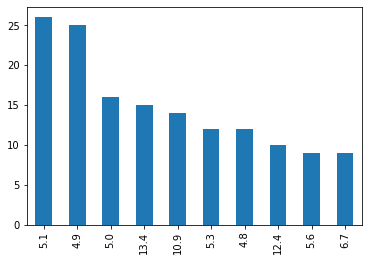

In [ ]:
bitcoin['price_bitcoin'].value_counts().head(10).plot.bar()

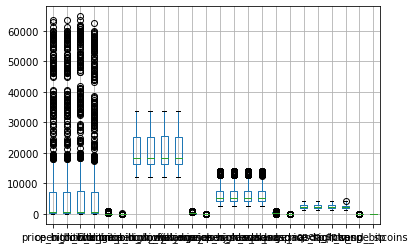

In [ ]:
bitcoin.plot.box(grid='True')

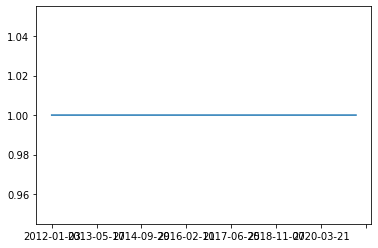

In [ ]:
bitcoin['Date'].value_counts().sort_index().plot.line()

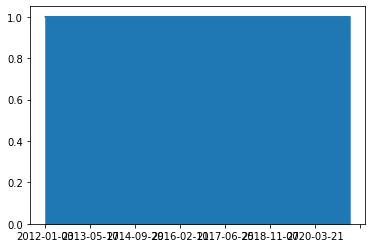

In [ ]:
bitcoin['Date'].value_counts().sort_index().plot.area()

##Bivariate

In [ ]:
bitcoin.columns =bitcoin.columns.get_level_values(0)
bitcoin.Date = pd.to_datetime(bitcoin.Date)
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

In [ ]:
closing = bitcoin.loc[:,['Date','price_bitcoin','price_dowjones', 'price_nasdaq', 'price_sp']]
closing.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2021-04-14,62795.9,33874.69,13947.08,4141.84
1,2021-04-13,63540.9,33677.27,13996.10,4141.59
2,2021-04-12,59863.8,33745.40,13850.00,4127.99
3,2021-04-11,59978.7,33800.60,13900.18,4128.80
4,2021-04-10,59748.4,33800.60,13900.18,4128.80


In [ ]:
closing = closing.sort_index(ascending=False)
closing = closing.reset_index()
closing = closing.drop(columns=['index'])
closing.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,4.9,12397.38,2648.72,1277.06
1,2012-01-04,5.6,12418.42,2648.36,1277.30
2,2012-01-05,6.9,12415.70,2669.86,1281.06
3,2012-01-06,6.7,12359.92,2674.22,1277.81
4,2012-01-07,6.8,12359.92,2674.22,1277.81


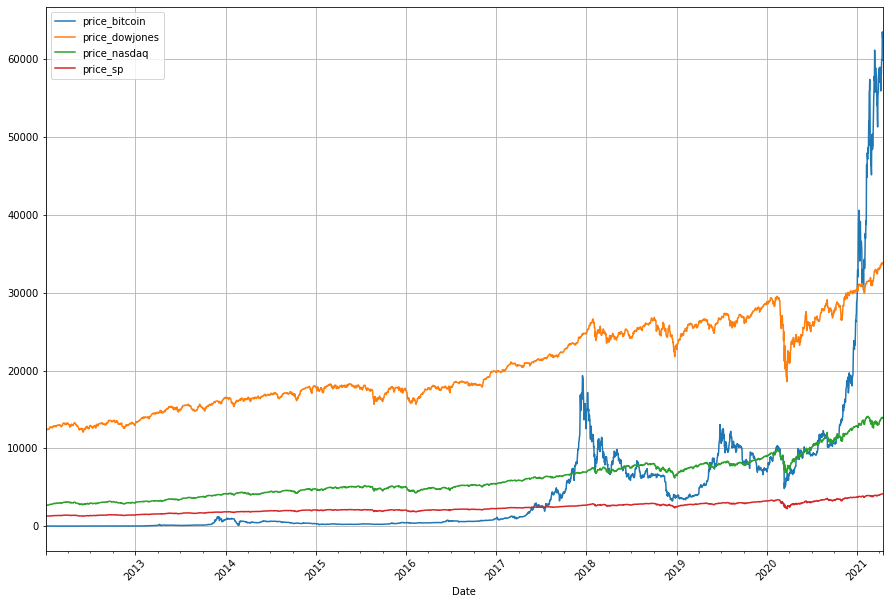

In [ ]:
closing.set_index('Date').plot(rot=45, grid=True, figsize=(15, 10))

The chart above shows the absolute closing prices.

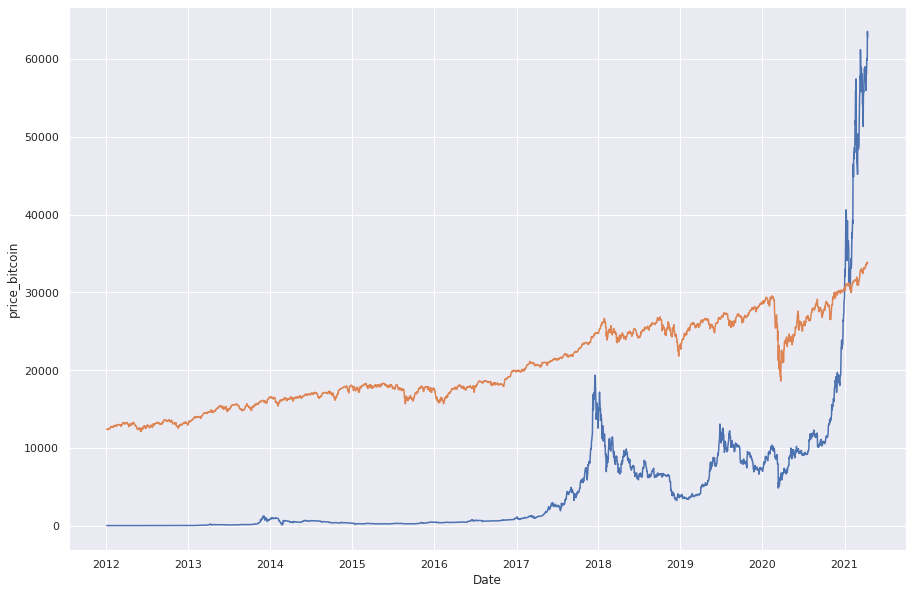

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = closing)
sns.lineplot(x = "Date", y = "price_dowjones", data = closing)

The trend seems to be relatively flat on Bitcoin abefore an explosion from 2017 to 2018. This is a significant point from which institutional investors saw an uptake in Bitcoin Investment. The DowJones price movement seems to be correlated to Bitcoin price movement from 2017 to 2021. However, the dips and rises in Bitcoin price seem steeper except in 2020 where the DowJones dipped more than Bitcoin.

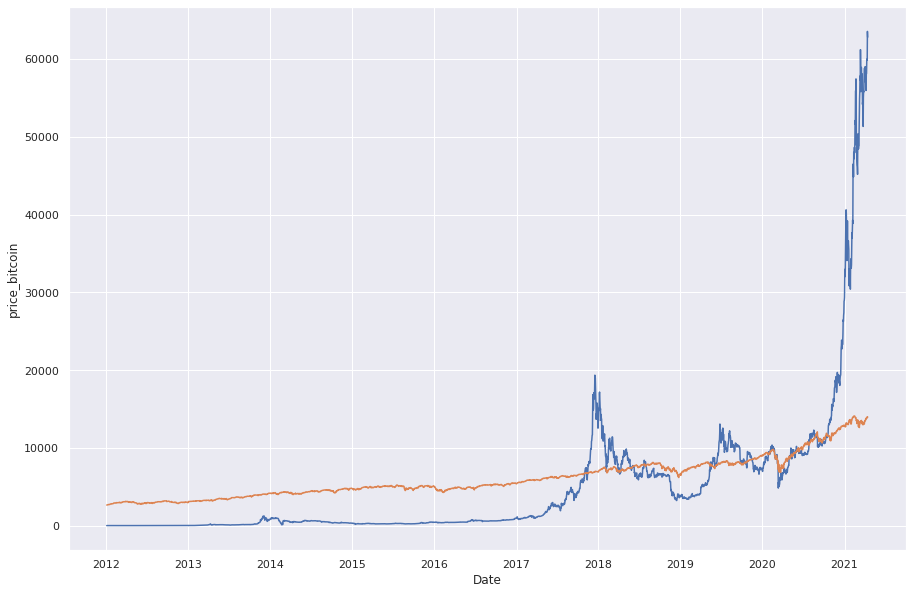

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = closing)
sns.lineplot(x = "Date", y = "price_nasdaq", data = closing)

The price movement of Nasdaq seems to be less correlated to the Bitcoin Price when compared to the DowJones price movement analyzed before.

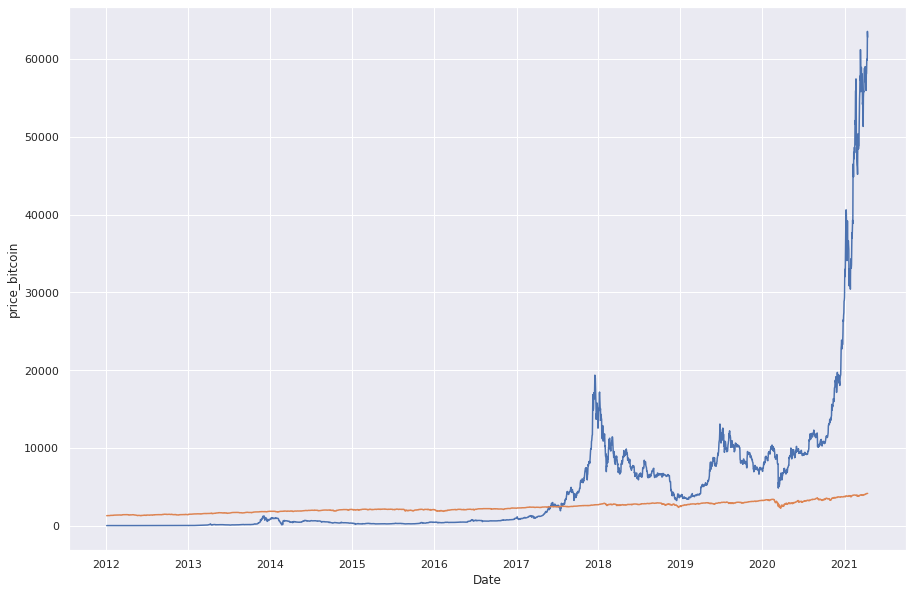

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = closing)
sns.lineplot(x = "Date", y = "price_sp", data = closing)

The price movement of S&P500 seems to be even less correlated to the Bitcoin Price when compared to the DowJones and Nasdaq price movements analyzed before.

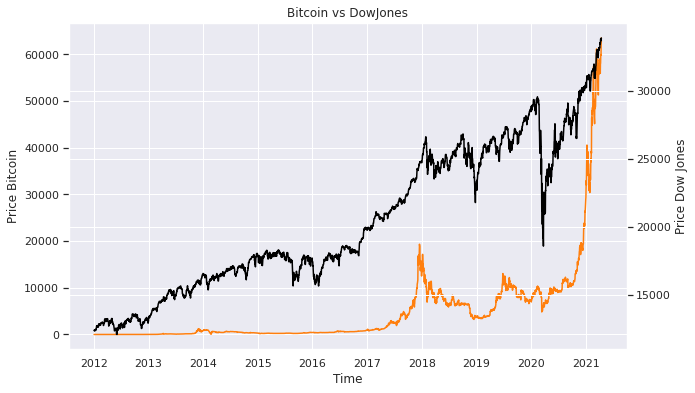

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

ax.set_xlabel('Time')
ax.set_ylabel('Price Bitcoin')
ax.set_title('Bitcoin vs DowJones')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(closing.Date, closing.price_bitcoin, color='tab:orange', label='Bitcoin')

# Plotting on the second y-axis
axb.set_ylabel('Price Dow Jones')
axb.plot(closing.Date, closing.price_dowjones, color='black', label='DowJones')

The correlation dicovered on the Dowjones plot before can be seen more clearly here when using 2 y axis. In between 2019 and 2020, the price movements seem to have decoupled as the price of DowJones went up, that of Bitcoin went down.

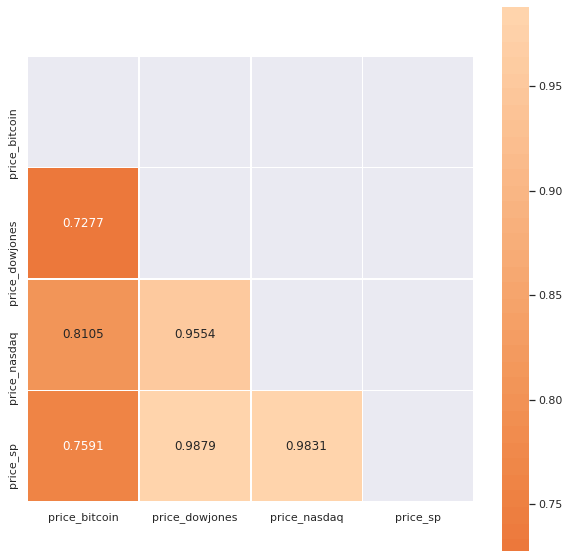

In [ ]:
# Compute the correlation matrix
corr = closing.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

The correlations discovered from the plots above seem to confirm the fact that the Bitcoin Price movement is strongly related to Dowjones, Nasdaq and S&P500 with all having a pearson correlation coefficient value greater than 0.7

In [ ]:
closing.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,4.9,12397.38,2648.72,1277.06
1,2012-01-04,5.6,12418.42,2648.36,1277.30
2,2012-01-05,6.9,12415.70,2669.86,1281.06
3,2012-01-06,6.7,12359.92,2674.22,1277.81
4,2012-01-07,6.8,12359.92,2674.22,1277.81


Absolute Values can be misleading due to differences in scale, it's therefore important to check the Relative Changes.

In [ ]:
# Relative Changes on a similar scale.

norm = closing.copy(deep=True)
norm.iloc[:,1:] = norm.iloc[:,1:].apply(lambda x: ((x-x.min())/ (x.max() - x.min())))
norm.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,0.000011,0.013591,0.000031,0.000000
1,2012-01-04,0.000022,0.014557,0.000000,0.000084
2,2012-01-05,0.000042,0.014432,0.001878,0.001396
3,2012-01-06,0.000039,0.011871,0.002259,0.000262
4,2012-01-07,0.000041,0.011871,0.002259,0.000262


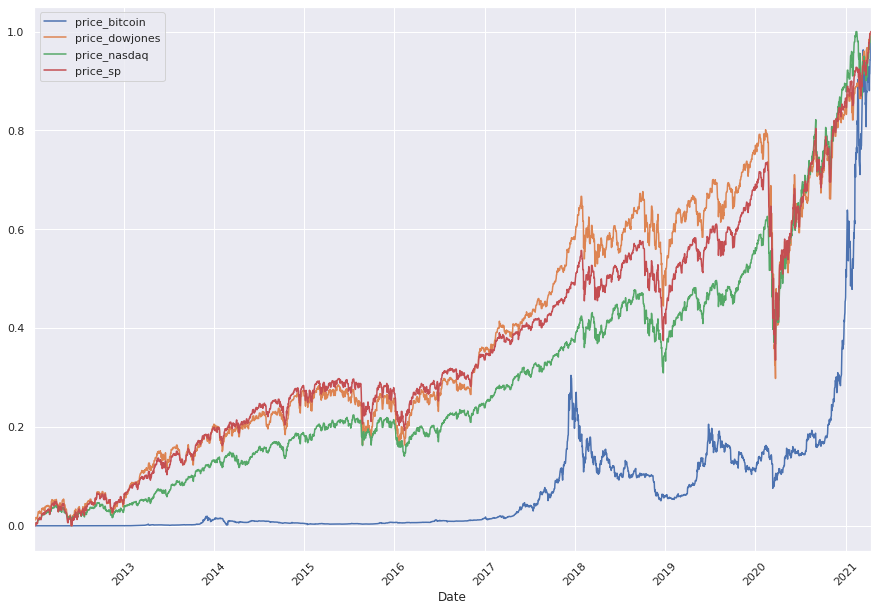

In [ ]:
norm.set_index('Date').plot(rot=45, grid=True, figsize=(15, 10))

All seem to be in a similar trend upwards.

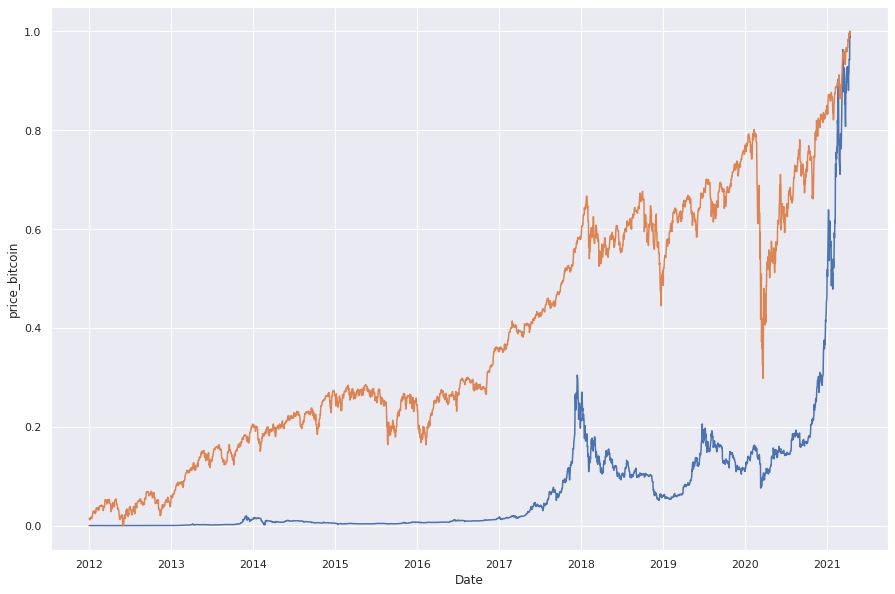

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = norm)
sns.lineplot(x = "Date", y = "price_dowjones", data = norm)

The correlation between Bitcoin Price movement and DowJones can be seen emphasized in the above plot.

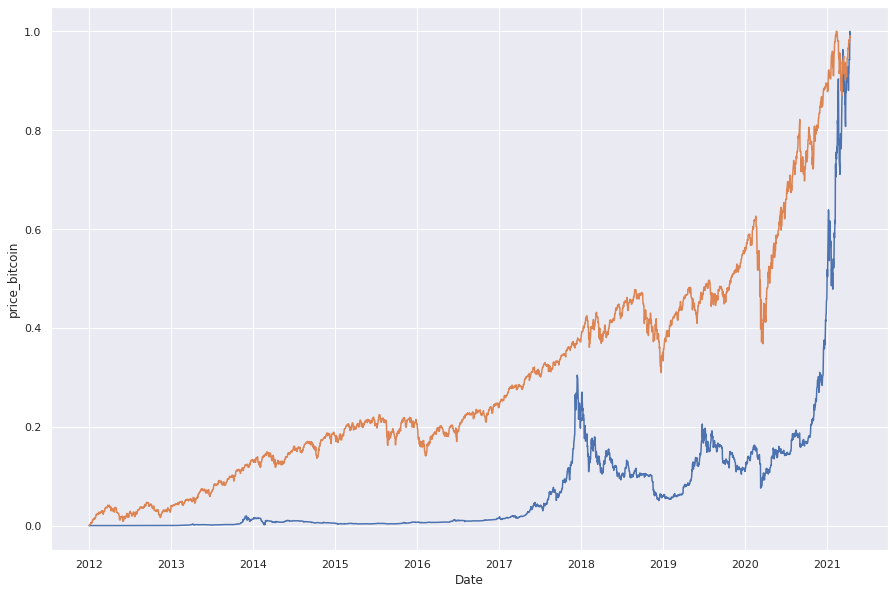

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = norm)
sns.lineplot(x = "Date", y = "price_nasdaq", data = norm)

The Nasdaq price correlation can be seen better here and is similar to the DowJones movement. The advantage of scaling the data can be seen as the relative relation shows the advantage compared to the absolute relation since the absolute relation didn't show this relation clearly.

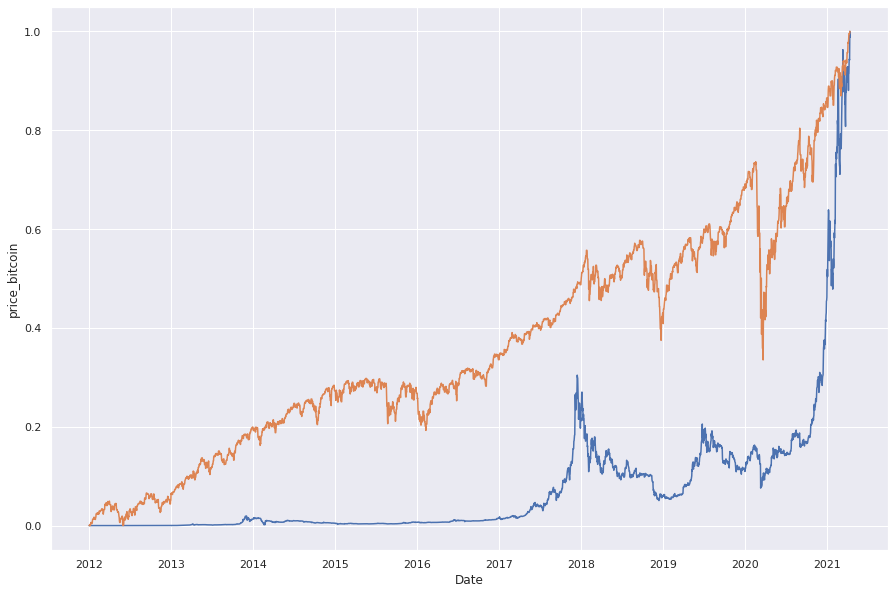

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = norm)
sns.lineplot(x = "Date", y = "price_sp", data = norm)

Similar to the Nasdaq plot. The S&P movement shows that it is more correlated than we thought when viewing the absolute relation plot.

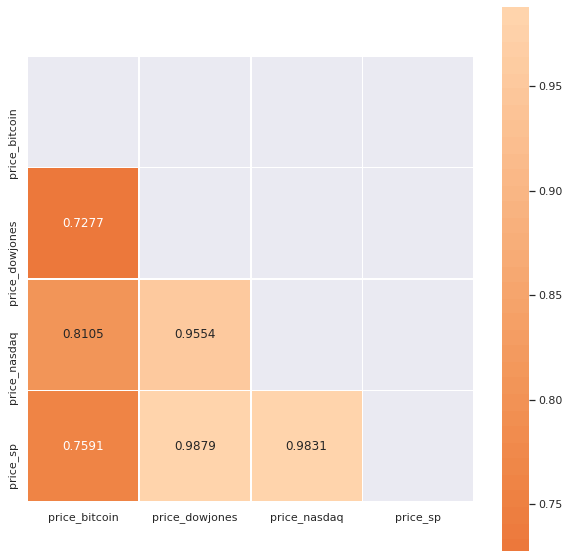

In [ ]:
# Compute the correlation matrix
corr = norm.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

The correlation matrix is the same as before.

In [ ]:
# Using log

df_log = closing.copy(deep= True)
df_log.iloc[:,1:] = df_log.iloc[:,1:].apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_log.head()

,Date,price_bitcoin,price_dowjones,price_nasdaq,price_sp
0,2012-01-03,NaN,NaN,NaN,NaN
1,2012-01-04,0.133531,0.001696,-0.000136,0.000188
2,2012-01-05,0.208755,-0.000219,0.008085,0.002939
3,2012-01-06,-0.029414,-0.004503,0.001632,-0.002540
4,2012-01-07,0.014815,0.000000,0.000000,0.000000


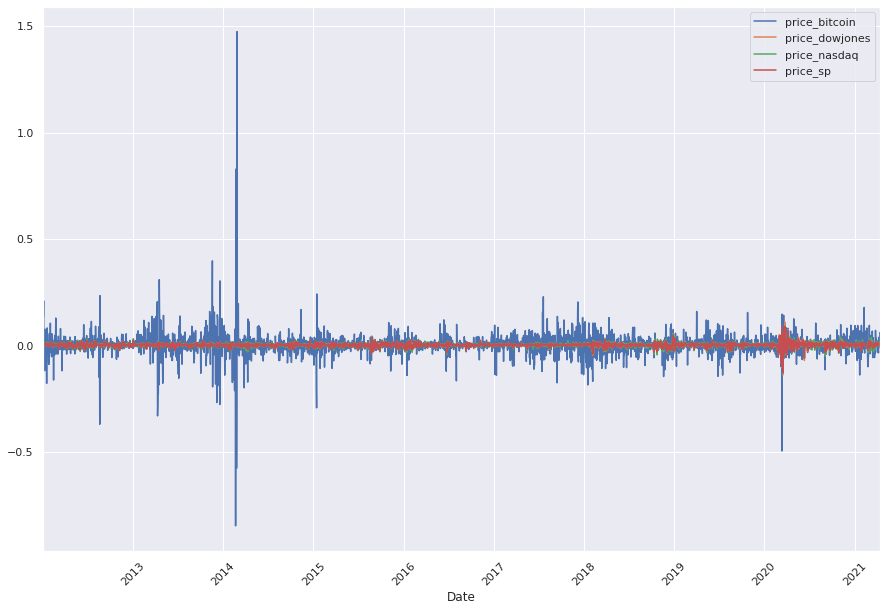

In [ ]:
df_log.set_index('Date').plot(rot=45, grid=True, figsize=(15, 10))

The log plot shows the frequencies of the different markets. Bitcoin Price Movement seems to be more exaggerated as compared to the other markets, showing its high volatility.

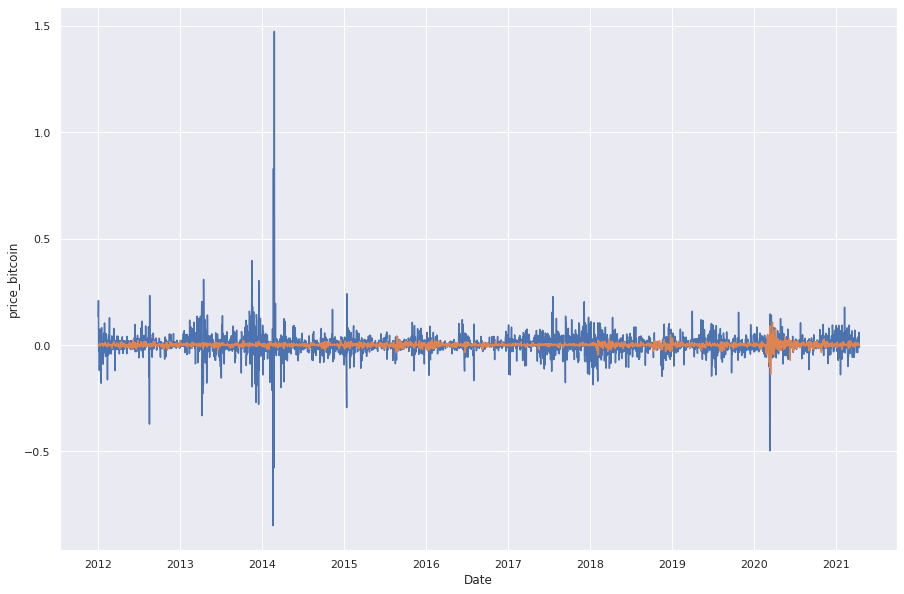

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = df_log)
sns.lineplot(x = "Date", y = "price_dowjones", data = df_log)

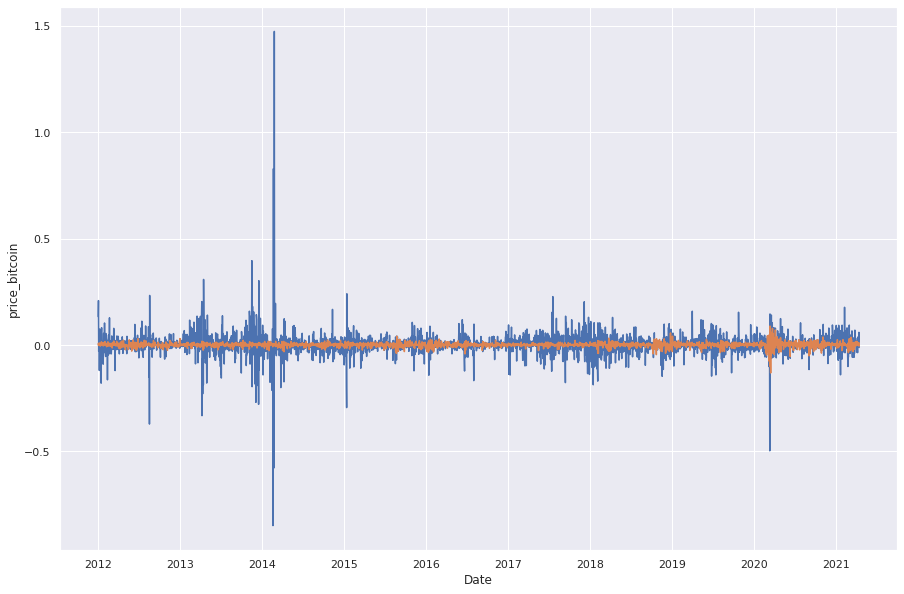

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = df_log)
sns.lineplot(x = "Date", y = "price_nasdaq", data = df_log)

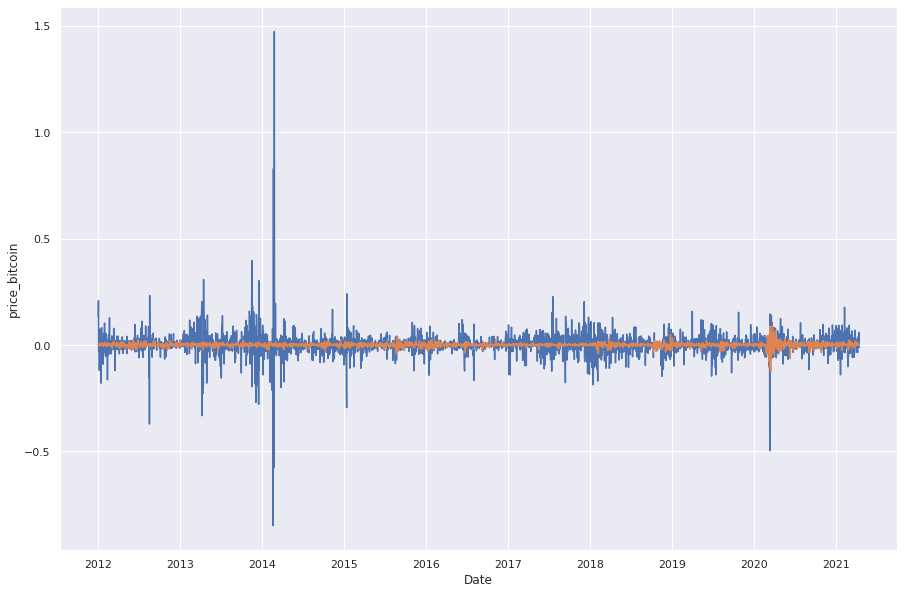

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

sns.lineplot(x = "Date", y = "price_bitcoin", data = df_log)
sns.lineplot(x = "Date", y = "price_sp", data = df_log)

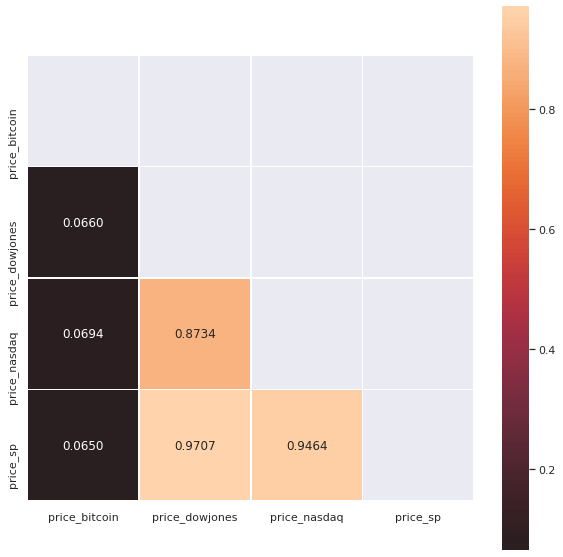

In [ ]:
# Compute the correlation matrix
corr = df_log.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

The log correlation provides an additional interesting insight. It shows that the price movement in the traditional markets i.e. Dowjones, Nasdaq and S&P500 are strongly correlated to each other in terms of frequency movement, however, they are all not correlated to that of Bitcoin. This means that the price change day to day in Bitcoin is different as compared to the traditional markets and could be due to the fact that Bitcoin Prices tend to move in larger values as compared to traditional markets due to its volatility.

## BIVARIATE ANALYSIS RECOMMENDATION

##Multivariate

###a)PCA

###b)LDA

# Feature Engineering

### Moving Averages

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

In [ ]:
bitcoin = bitcoin.sort_index(ascending=False)
bitcoin = bitcoin.reset_index()
bitcoin = bitcoin.drop(columns=['index'])
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0
1,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0
2,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0
3,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0
4,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0


In [ ]:
# We compute the simple moving average over a period of 10 and 20 years (size of the window), 
# selecting in all cases a minimum number of periods of 1. 
# As shown below, we add the moving averages to the existing data frames

sma_7days = 7
sma_25days = 25
sma_50days = 50
sma_200days = 200

bitcoin['SMA_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).mean()
bitcoin['SMA_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).mean()
bitcoin['SMA_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).mean()
bitcoin['SMA_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).mean()
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200
0,2012-01-03,4.9,5.2,5.3,4.7,125.17,6.51,12397.38,12221.19,12479.65,12221.19,152.56,1.47,2648.72,2657.39,2665.90,2641.98,411.79,1.67,1277.06,1258.86,1284.62,1258.86,1.55,38.0,4.900,4.900,4.900,4.900
1,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0,5.250,5.250,5.250,5.250
2,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0,5.800,5.800,5.800,5.800
3,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0,6.025,6.025,6.025,6.025
4,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0,6.180,6.180,6.180,6.180


### STATISTICAL INFORMATION OVER MOVING WINDOWS

In [ ]:
# Rolling Minimum

bitcoin['Min_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).min()
bitcoin['Min_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).min()
bitcoin['Min_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).min()
bitcoin['Min_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).min()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2


In [ ]:
# Rolling Maximum

bitcoin['Max_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).max()
bitcoin['Max_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).max()
bitcoin['Max_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).max()
bitcoin['Max_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).max()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9


In [ ]:
# Rolling Median

bitcoin['Median_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).median()
bitcoin['Median_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).median()
bitcoin['Median_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).median()
bitcoin['Median_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).median()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75


In [ ]:
# Rolling Deviation

bitcoin['Deviation_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).std()
bitcoin['Deviation_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).std()
bitcoin['Deviation_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).std()
bitcoin['Deviation_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).std()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200,Deviation_7,Deviation_25,Deviation_50,Deviation_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65,1165.056384,2168.652524,4307.870682,17005.379639
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95,1355.058643,2216.884669,4369.768162,17057.146883
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05,1453.968327,2283.572265,4413.559704,17107.345350
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35,2348.111875,2611.502125,4581.997026,17185.288683
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75,2122.445753,2824.848860,4626.984931,17252.403220


In [ ]:
# Rolling Variance

bitcoin['Variance_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).var()
bitcoin['Variance_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).var()
bitcoin['Variance_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).var()
bitcoin['Variance_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).var()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200,Deviation_7,Deviation_25,Deviation_50,Deviation_200,Variance_7,Variance_25,Variance_50,Variance_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65,1165.056384,2168.652524,4307.870682,17005.379639,1.357356e+06,4.703054e+06,1.855775e+07,2.891829e+08
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95,1355.058643,2216.884669,4369.768162,17057.146883,1.836184e+06,4.914578e+06,1.909487e+07,2.909463e+08
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05,1453.968327,2283.572265,4413.559704,17107.345350,2.114024e+06,5.214702e+06,1.947951e+07,2.926613e+08
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35,2348.111875,2611.502125,4581.997026,17185.288683,5.513629e+06,6.819943e+06,2.099470e+07,2.953341e+08
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75,2122.445753,2824.848860,4626.984931,17252.403220,4.504776e+06,7.979771e+06,2.140899e+07,2.976454e+08


In [ ]:
# Rolling Sum

bitcoin['Sum_7'] = bitcoin.price_bitcoin.rolling(sma_7days, min_periods=1).sum()
bitcoin['Sum_25'] = bitcoin.price_bitcoin.rolling(sma_25days, min_periods=1).sum()
bitcoin['Sum_50'] = bitcoin.price_bitcoin.rolling(sma_50days, min_periods=1).sum()
bitcoin['Sum_200'] = bitcoin.price_bitcoin.rolling(sma_200days, min_periods=1).sum()
bitcoin.tail()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins,SMA_7,SMA_25,SMA_50,SMA_200,Min_7,Min_25,Min_50,Min_200,Max_7,Max_25,Max_50,Max_200,Median_7,Median_25,Median_50,Median_200,Deviation_7,Deviation_25,Deviation_50,Deviation_200,Variance_7,Variance_25,Variance_50,Variance_200,Sum_7,Sum_25,Sum_50,Sum_200
3385,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0,58154.685714,57041.876,54665.388,31456.3905,55948.7,51322.3,45164.0,10237.3,59748.4,59748.4,61195.3,61195.3,58118.7,57996.3,55893.3,29154.65,1165.056384,2168.652524,4307.870682,17005.379639,1.357356e+06,4.703054e+06,1.855775e+07,2.891829e+08,407082.8,1426046.9,2733269.4,6291278.1
3386,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0,58408.800000,57084.484,54746.488,31705.0975,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,57996.3,55905.8,29881.95,1355.058643,2216.884669,4369.768162,17057.146883,1.836184e+06,4.914578e+06,1.909487e+07,2.909463e+08,408861.6,1427112.1,2737324.4,6341019.5
3387,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0,58533.142857,57172.796,54795.088,31950.7195,55948.7,51322.3,45164.0,10544.2,59978.7,59978.7,61195.3,61195.3,58118.7,58077.4,55905.8,30623.05,1453.968327,2283.572265,4413.559704,17107.345350,2.114024e+06,5.214702e+06,1.947951e+07,2.926613e+08,409732.0,1429319.9,2739754.4,6390143.9
3388,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0,59325.228571,57390.912,54983.670,32214.9800,55948.7,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59748.4,58077.4,56419.2,31432.35,2348.111875,2611.502125,4581.997026,17185.288683,5.513629e+06,6.819943e+06,2.099470e+07,2.953341e+08,415276.6,1434772.8,2749183.5,6442996.0
3389,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0,60303.400000,57579.012,55261.364,32475.3200,58077.4,51322.3,45164.0,10544.2,63540.9,63540.9,63540.9,63540.9,59863.8,58077.4,56974.8,32055.75,2122.445753,2824.848860,4626.984931,17252.403220,4.504776e+06,7.979771e+06,2.140899e+07,2.976454e+08,422123.8,1439475.3,2763068.2,6495064.0


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              3390 non-null   datetime64[ns]
 1   price_bitcoin     3390 non-null   float64       
 2   open_bitcoin      3390 non-null   float64       
 3   high_bitcoin      3390 non-null   float64       
 4   low_bitcoin       3390 non-null   float64       
 5   vol_bitcoin       3390 non-null   float64       
 6   Change_bitcoin_%  3390 non-null   float64       
 7   price_dowjones    3390 non-null   float64       
 8   open_dowjones     3390 non-null   float64       
 9   high_dowjones     3390 non-null   float64       
 10  low_dowjones      3390 non-null   float64       
 11  vol_dowjones      3390 non-null   float64       
 12  change_dowjones   3390 non-null   float64       
 13  price_nasdaq      3390 non-null   float64       
 14  open_nasdaq       3390 n

# Implementing the Solution 

## Modelling

In [ ]:
bitcoin_copy = bitcoin.copy()
bitcoin_copy.rename(columns={'Date':'ds'},inplace=True)
bitcoin_copy.head()

# Learning

In [ ]:
bitcoin.head()

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0


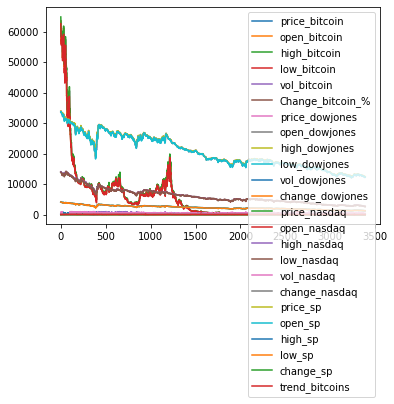

In [ ]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
# df = read_csv(path, header=0)
# # plot the time series
bitcoin.plot()
pyplot.show()

In [ ]:
ds= bitcoin['Date']
col= bitcoin.drop(['Date'],1)

In [ ]:
bitcoin.columns

Index(['Date', 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins'],
      dtype='object')

In [ ]:
from fbprophet import Prophet
cols = [ 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins']
results = []
for col in cols:
    # subdf = df[['ds', col]].dropna()
    subdf = bitcoin_copy.rename(columns={'ds':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods = 90))
    results.append(result)
# df.predict = pd.concat(results, axis=1)
# df.predict.to_csv('example_file.csv')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [ ]:
results

[             ds         trend  ...  multiplicative_terms_upper          yhat
 0    2012-01-03   -378.552660  ...                         0.0    613.080681
 1    2012-01-04   -377.477518  ...                         0.0    691.691312
 2    2012-01-05   -376.402375  ...                         0.0    670.560963
 3    2012-01-06   -375.327233  ...                         0.0    740.984701
 4    2012-01-07   -374.252091  ...                         0.0    797.665189
 ...         ...           ...  ...                         ...           ...
 3475 2021-07-09  35015.922262  ...                         0.0  34520.629136
 3476 2021-07-10  35059.471726  ...                         0.0  34572.631232
 3477 2021-07-11  35103.021190  ...                         0.0  34591.158157
 3478 2021-07-12  35146.570654  ...                         0.0  34645.013932
 3479 2021-07-13  35190.120118  ...                         0.0  34680.644330
 
 [3480 rows x 19 columns],
              ds         trend  ...

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


              ds  price_bitcoin  open_bitcoin  ...   low_sp  change_sp     y
3373  2012-01-19            6.4           5.9  ...  1308.07       0.49  24.0
3374  2012-01-18            5.9           5.6  ...  1290.99       1.11  58.0
3375  2012-01-17            5.6           6.7  ...  1290.22       0.36  12.0
3376  2012-01-16            6.7           7.0  ...  1277.58       0.49  36.0
3377  2012-01-15            7.0           6.8  ...  1277.58       0.49  21.0

[5 rows x 25 columns]
MAE: 64.989


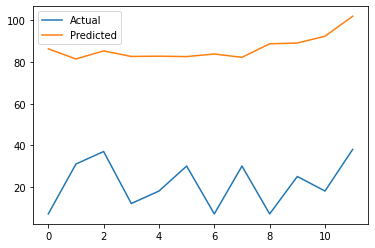

In [ ]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
# path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
# df = read_csv(path, header=0)
# prepare expected column names
# df.columns = ['ds', 'y']
# df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
cols = [ 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins']
# results = []
for col in cols:
    # subdf = df[['ds', col]].dropna()
    subdf = bitcoin_copy.rename(columns={'ds':'ds', col:'y'})
train = subdf.drop(subdf.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '2021-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = subdf['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
import pandas_datareader as web
df = web.DataReader('BTC-USD',data_source='yahoo', start='2012-01-01', end='2021-04-19')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-04-15,63594.722656,60222.531250,63258.503906,61572.789062,8.429301e+10,61572.789062
2021-04-16,62572.175781,60361.351562,61529.921875,60683.820312,6.613876e+10,60683.820312
2021-04-17,61057.457031,52829.535156,60701.886719,56216.183594,9.746887e+10,56216.183594


# Main one

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import fbprophet

In [ ]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [ ]:
bitcoin

,Date,price_bitcoin,open_bitcoin,high_bitcoin,low_bitcoin,vol_bitcoin,Change_bitcoin_%,price_dowjones,open_dowjones,high_dowjones,low_dowjones,vol_dowjones,change_dowjones,price_nasdaq,open_nasdaq,high_nasdaq,low_nasdaq,vol_nasdaq,change_nasdaq,price_sp,open_sp,high_sp,low_sp,change_sp,trend_bitcoins
0,2021-04-14,62795.9,63544.2,64778.0,62557.4,116.57,1.17,33874.69,33668.95,33910.59,33668.95,175.46,0.59,13947.08,14004.07,14033.63,13928.49,439.56,0.35,4141.84,4140.40,4151.97,4138.20,0.01,45.0
1,2021-04-13,63540.9,59863.6,63659.0,59839.4,126.56,6.14,33677.27,33721.16,33741.64,33545.84,330.00,0.20,13996.10,13902.45,14011.51,13902.45,839.45,1.05,4141.59,4130.10,4148.00,4124.43,0.33,45.0
2,2021-04-12,59863.8,59982.1,61259.9,59569.2,81.88,0.19,33745.40,33775.06,33786.19,33665.54,329.02,0.16,13850.00,13854.44,13877.00,13783.95,894.01,0.36,4127.99,4124.71,4131.76,4114.82,0.02,45.0
3,2021-04-11,59978.7,59772.4,60667.1,59250.3,58.20,0.39,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,45.0
4,2021-04-10,59748.4,58127.4,61229.0,57900.0,103.72,2.80,33800.60,33526.19,33810.87,33526.19,317.82,0.89,13900.18,13787.01,13905.41,13748.35,785.76,0.51,4128.80,4096.11,4129.48,4095.51,0.77,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,2012-01-07,6.8,6.7,7.0,6.4,48.39,1.64,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,30.0
3386,2012-01-06,6.7,6.9,7.2,6.1,218.08,3.60,12359.92,12407.45,12415.24,12332.41,131.12,0.45,2674.22,2671.17,2682.12,2658.83,412.31,0.16,1277.81,1280.93,1281.84,1273.34,0.25,7.0
3387,2012-01-05,6.9,5.6,7.2,5.6,182.33,24.78,12415.70,12418.42,12435.98,12283.90,158.44,0.02,2669.86,2642.57,2673.56,2631.23,442.08,0.81,1281.06,1277.30,1283.05,1265.26,0.29,25.0
3388,2012-01-04,5.6,4.9,5.7,4.8,131.17,14.14,12418.42,12392.46,12430.00,12337.25,145.13,0.17,2648.36,2639.90,2653.18,2627.23,411.09,0.01,1277.30,1277.03,1278.73,1268.10,0.02,18.0


In [ ]:

df = bitcoin.filter(['Date','price_bitcoin'])
df.head()

,Date,price_bitcoin
0,2021-04-14,62795.9
1,2021-04-13,63540.9
2,2021-04-12,59863.8
3,2021-04-11,59978.7
4,2021-04-10,59748.4


In [ ]:
df.index[df['price_bitcoin'] < 0]

Int64Index([], dtype='int64')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


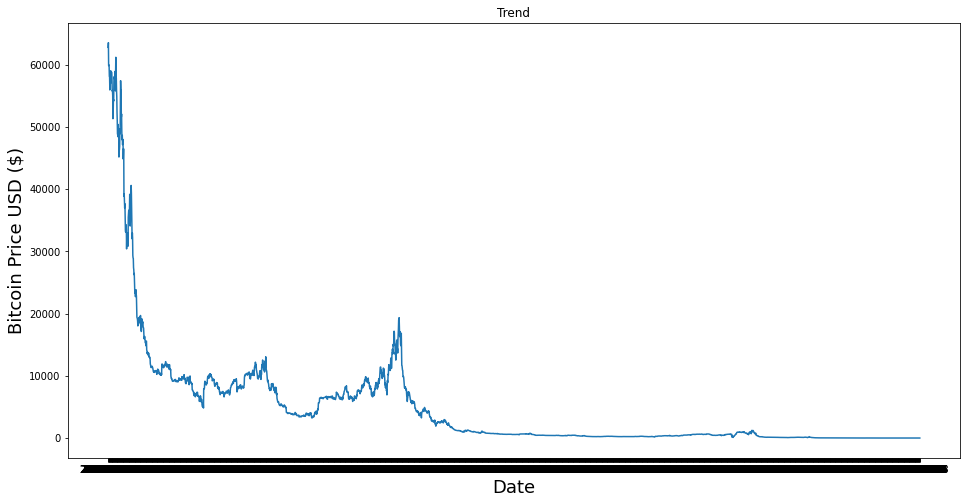

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['price_bitcoin'])
plt.title('Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Bitcoin Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# yt = yt-y(t-1) 
df['price_shift'] = df['price_bitcoin'] - df['price_bitcoin'].shift(1)
y = df['price_shift']

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


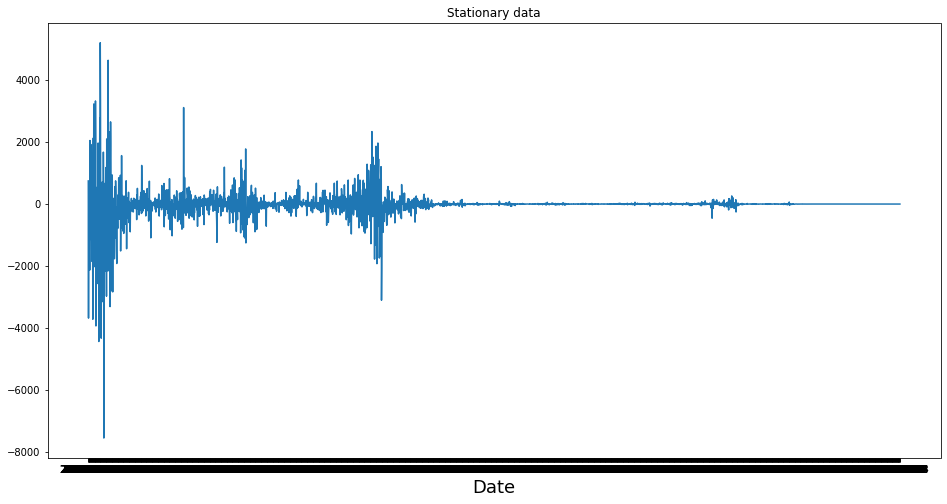

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'],df['price_shift'])
plt.title('Stationary data')
plt.xlabel('Date', fontsize=18)
plt.show()

In [ ]:
model = Prophet()

In [ ]:
df.columns

Index(['Date', 'price_bitcoin', 'price_shift'], dtype='object')

In [ ]:
cols = [ 'price_bitcoin', 'open_bitcoin', 'high_bitcoin', 'low_bitcoin',
       'vol_bitcoin', 'Change_bitcoin_%', 'price_dowjones', 'open_dowjones',
       'high_dowjones', 'low_dowjones', 'vol_dowjones', 'change_dowjones',
       'price_nasdaq', 'open_nasdaq', 'high_nasdaq', 'low_nasdaq',
       'vol_nasdaq', 'change_nasdaq', 'price_sp', 'open_sp', 'high_sp',
       'low_sp', 'change_sp', 'trend_bitcoins']
results = []
for col in cols:
    subdf = bitcoin_copy.rename(columns={'ds':'ds', col:'y'})
    m = Prophet()
    m.fit(subdf)
    result = m.predict(m.make_future_dataframe(periods = 90))
    results.append(result)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [ ]:
## Split the Data
train_data_len1 = int(0.8*len(bitcoin_copy))
train_data_len1

2712

In [ ]:
df_train1 = subdf[:train_data_len1]
df_test1 = subdf[train_data_len1:]
df_train1.head(), df_train1.shape

(           ds  price_bitcoin  open_bitcoin  ...   low_sp  change_sp     y
 0  2021-04-14        62795.9       63544.2  ...  4138.20       0.01  45.0
 1  2021-04-13        63540.9       59863.6  ...  4124.43       0.33  45.0
 2  2021-04-12        59863.8       59982.1  ...  4114.82       0.02  45.0
 3  2021-04-11        59978.7       59772.4  ...  4095.51       0.77  45.0
 4  2021-04-10        59748.4       58127.4  ...  4095.51       0.77  46.0
 
 [5 rows x 25 columns], (2712, 25))

In [ ]:
model.fit(df_train1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
periods1 = len(bitcoin_copy)-len(df_train1)
periods1

678

In [ ]:
# Create Future Datas of len(df)-len(df_train) days
future_dates1 = model.make_future_dataframe(periods=periods1)

In [ ]:
# Shape after adding 401 days
future_dates1.shape

(3390, 1)

In [ ]:
future_dates1.head()

,ds
0,2013-11-11
1,2013-11-12
2,2013-11-13
3,2013-11-14
4,2013-11-15


In [ ]:
# Make Prediction 
prediction = model.predict(future_dates1)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-11-11,30.622561,9.025094,53.659628,30.622561,30.622561,0.854436,0.854436,0.854436,0.328534,0.328534,0.328534,0.525901,0.525901,0.525901,0.0,0.0,0.0,31.476997
1,2013-11-12,30.656519,8.972461,55.246850,30.656519,30.656519,1.580017,1.580017,1.580017,0.835269,0.835269,0.835269,0.744748,0.744748,0.744748,0.0,0.0,0.0,32.236536
2,2013-11-13,30.690476,10.843139,56.248489,30.690476,30.690476,2.244362,2.244362,2.244362,1.197475,1.197475,1.197475,1.046886,1.046886,1.046886,0.0,0.0,0.0,32.934838
3,2013-11-14,30.724433,10.655352,57.534985,30.724433,30.724433,3.050372,3.050372,3.050372,1.623420,1.623420,1.623420,1.426951,1.426951,1.426951,0.0,0.0,0.0,33.774805
4,2013-11-15,30.758391,11.241140,55.235920,30.758391,30.758391,1.784738,1.784738,1.784738,-0.092663,-0.092663,-0.092663,1.877402,1.877402,1.877402,0.0,0.0,0.0,32.543129


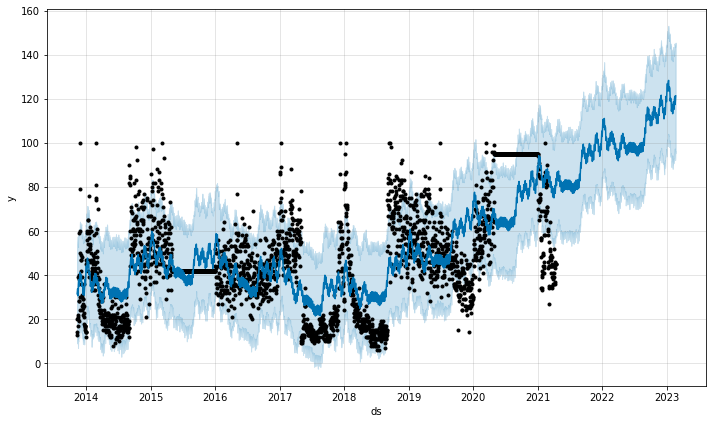

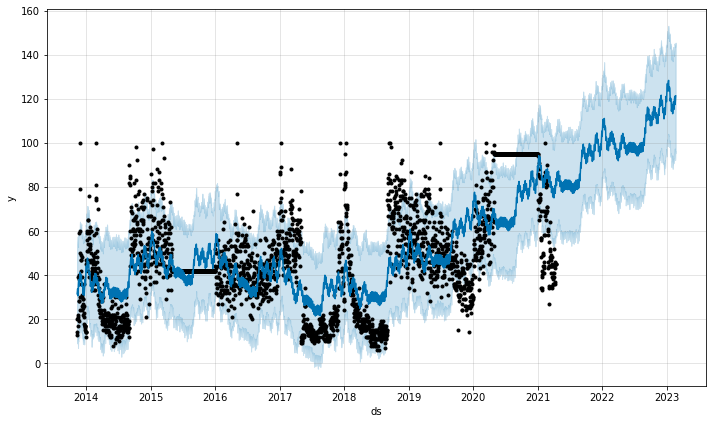

In [ ]:
# Plot Our Predictions
model.plot(prediction)

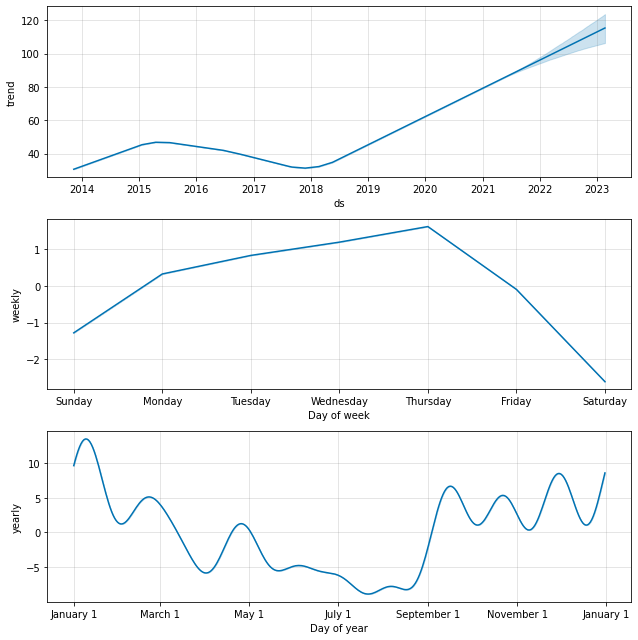

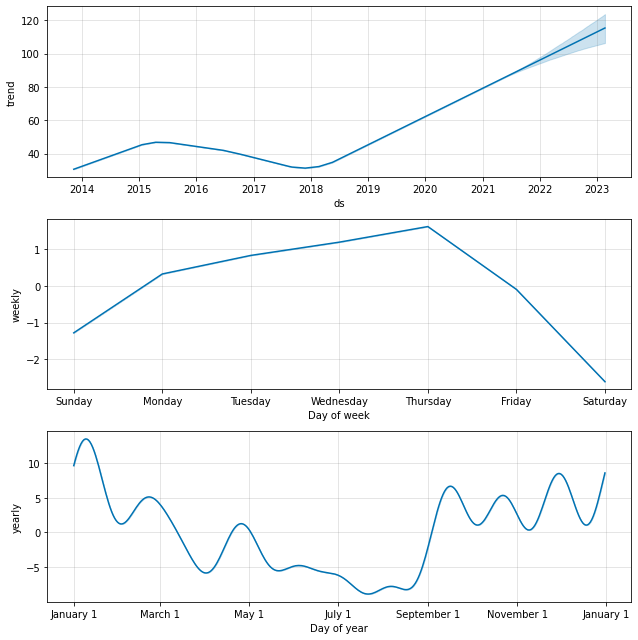

In [ ]:
model.plot_components(prediction)

### Predicting the Test dataset

# Challenging the Solution

# Recommendations




# Follow up questions

## a). Did we have the right data?

## b). Do we need other data to answer our question? 

## c). Did we have the right question? 

# Conclusion